In [ ]:
!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.7 MB/s 
     |████████████████████████████████| 132 kB 31.1 MB/s 
     |████████████████████████████████| 9.0 MB 43.8 MB/s 
     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 139 kB 34.9 MB/s 
     |████████████████████████████████| 127 kB 37.4 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=f345aebbfb3f5db15dae4a298641f7cc87785f319b12596b4171690998327e76
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/') 

# CADE 2001 + 2002-2006

In [ ]:
!cat file2001.txt file1619.txt > post_2016_compass.txt

In [ ]:
# train the compass

from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
aligner_post = CADE(size=100)

aligner_post.train_compass("post_2016_compass.txt", overwrite=False)

Training the compass from scratch.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# train the slices

slice_2001 = aligner_post.train_slice("file2001.txt", save=False)
slice_post2001 = aligner_post.train_slice("file1619.txt", save=False)

Training embeddings: slice file2001.txt.


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Initializing embeddings from compass.
Training embeddings: slice file1619.txt.
Initializing embeddings from compass.


In [ ]:
from scipy.spatial.distance import cosine
print(1 - cosine(slice_2001.wv["attack"], slice_post2001.wv["attack"]))

0.8333175182342529


## Slice 2001 - Most Similar words for a word

In [ ]:
slice_2001.wv.most_similar("al-qaeda")

[('bin-laden', 0.8121387958526611),
 ('suspected', 0.763967752456665),
 ('hezbollah', 0.754959225654602),
 ('jordanian', 0.7288669347763062),
 ('lieutenants', 0.7271885871887207),
 ('hijazi', 0.7255750298500061),
 ('jordanians', 0.7182580828666687),
 ('sudan', 0.7164555788040161),
 ('jihad', 0.7059038281440735),
 ('zawahiri', 0.7008429765701294)]

In [ ]:
slice_2001.wv.most_similar("bin-laden")

[('al-qaeda', 0.8121389746665955),
 ('osama', 0.8074260950088501),
 ('usama', 0.6849421858787537),
 ('jihad', 0.6786238551139832),
 ('zawahiri', 0.6759649515151978),
 ('capture', 0.6720476150512695),
 ('hezbollah', 0.6712418794631958),
 ('lieutenants', 0.6694173812866211),
 ('terrorists', 0.6632336378097534),
 ('jordanians', 0.6577796936035156)]

In [ ]:
slice_2001.wv.most_similar("airplane")

[('jet', 0.7716299891471863),
 ('plane', 0.7384181022644043),
 ('planes', 0.7375824451446533),
 ('airplanes', 0.7098285555839539),
 ('cruiser', 0.7021271586418152),
 ('fly', 0.6855882406234741),
 ('hijacked', 0.6840974688529968),
 ('airliner', 0.6760938167572021),
 ('crashes', 0.6742455959320068),
 ('sonic', 0.6716773509979248)]

In [ ]:
slice_2001.wv.most_similar("twin-towers")

[('world-trade-center', 0.8434485197067261),
 ('towers', 0.7847713828086853),
 ('hijacked', 0.7701582908630371),
 ('collapsed', 0.7636470794677734),
 ('jetliners', 0.7554636001586914),
 ('jetliner', 0.7319991588592529),
 ('explosion', 0.7283482551574707),
 ('crashed', 0.7226091027259827),
 ('blast', 0.7215662002563477),
 ('bomb', 0.7172610759735107)]

In [ ]:
slice_2001.wv.most_similar("tower")

[('floors', 0.7176899313926697),
 ('world-trade-center', 0.6957723498344421),
 ('towers', 0.6927168369293213),
 ('blocks', 0.6115195155143738),
 ('twin-towers', 0.5999486446380615),
 ('building', 0.5969998240470886),
 ('collapsed', 0.5867820978164673),
 ('midtown', 0.5836725234985352),
 ('crashed', 0.5799667835235596),
 ('vacant', 0.5714786648750305)]

In [ ]:
slice_2001.wv.most_similar("terrorism")

[('terror', 0.7607632875442505),
 ('terrorists', 0.7189465761184692),
 ('allies', 0.7029083967208862),
 ('iraq', 0.7007049322128296),
 ('israel', 0.6938610076904297),
 ('enemies', 0.6929492354393005),
 ('threats', 0.6919865608215332),
 ('extremism', 0.6858663558959961),
 ('atrocities', 0.6845217347145081),
 ('threat', 0.6790900230407715)]

In [ ]:
slice_2001.wv.most_similar("world-trade-center")

[('twin-towers', 0.8434484004974365),
 ('towers', 0.8420126438140869),
 ('collapsed', 0.697087287902832),
 ('tower', 0.6957722902297974),
 ('hijacked', 0.683588981628418),
 ('crashed', 0.6565600633621216),
 ('explosion', 0.6468310356140137),
 ('evacuated', 0.6433192491531372),
 ('reis', 0.6392120718955994),
 ('pentagon', 0.6353920698165894)]

In [ ]:
slice_2001.wv.most_similar("attack")

[('attacks', 0.7988766431808472),
 ('bombing', 0.6632686853408813),
 ('twin-towers', 0.6239731311798096),
 ('bomb', 0.6077284216880798),
 ('disaster', 0.5843971967697144),
 ('bombed', 0.57609623670578),
 ('assaults', 0.556792140007019),
 ('attacked', 0.5543144941329956),
 ('retaliation', 0.5520727634429932),
 ('targets', 0.5511182546615601)]

In [ ]:
slice_2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('crashed', 0.8650121688842773),
 ('jetliner', 0.8263962268829346),
 ('planes', 0.8229048252105713),
 ('airliners', 0.822436511516571),
 ('jetliners', 0.7948459386825562),
 ('airplanes', 0.7912923693656921),
 ('airliner', 0.7868536710739136),
 ('aboard', 0.773901104927063),
 ('twin-towers', 0.7701582908630371),
 ('flew', 0.768852710723877)]

In [ ]:
slice_2001.wv.most_similar("firefighter")

[('capt', 0.7482067346572876),
 ('hawkins', 0.7063535451889038),
 ('burns', 0.691942572593689),
 ('mccarty', 0.6842734813690186),
 ('burgess', 0.6703702211380005),
 ('heeran', 0.6690577864646912),
 ('brooks', 0.6690102815628052),
 ('curtis', 0.6608737111091614),
 ('trevor', 0.6584910750389099),
 ('maloney', 0.6577110290527344)]

In [ ]:
slice_2001.wv.most_similar("afghanistan")

[('afghan', 0.7945151329040527),
 ('soviets', 0.7886782288551331),
 ('afghans', 0.7735050320625305),
 ('pakistan', 0.7569142580032349),
 ('taliban', 0.7528525590896606),
 ('province', 0.7421625852584839),
 ('kosovo', 0.7365880012512207),
 ('regime', 0.735585629940033),
 ('chechnya', 0.7343432903289795),
 ('macedonia', 0.730475902557373)]

In [ ]:
slice_2001.wv.most_similar("islam")

[('islamic', 0.8339390754699707),
 ('muslim', 0.8338642120361328),
 ('religious', 0.8037272691726685),
 ('democracy', 0.8017979860305786),
 ('muslims', 0.7919420599937439),
 ('religion', 0.7904722690582275),
 ('fundamentalist', 0.7592930793762207),
 ('christianity', 0.7558989524841309),
 ('fundamentalism', 0.7550260424613953),
 ('teachings', 0.7537658214569092)]

In [ ]:
slice_2001.wv.most_similar("jihad")

[('militants', 0.8500947952270508),
 ('militant', 0.8356325626373291),
 ('extremists', 0.8309036493301392),
 ('sheik', 0.8197488784790039),
 ('zawahiri', 0.8169273138046265),
 ('fundamentalist', 0.8052530288696289),
 ('arabs', 0.7971756458282471),
 ('egyptian', 0.7946093678474426),
 ('shiite', 0.7931442260742188),
 ('fundamentalism', 0.791559100151062)]

## Slice post 2001 - Most Similar words for a word

In [ ]:
slice_post2001.wv.most_similar("al-qaeda")

[('militias', 0.8390994668006897),
 ('libya', 0.8378942012786865),
 ('kurds', 0.822980523109436),
 ('hezbollah', 0.8119243383407593),
 ('hamas', 0.8110686540603638),
 ('militant', 0.8090489506721497),
 ('shiite', 0.8087493181228638),
 ('isil', 0.8023427724838257),
 ('abu', 0.797472357749939),
 ('jihadists', 0.7969104051589966)]

In [ ]:
slice_post2001.wv.most_similar("bin-laden")

[('osama', 0.9113789796829224),
 ('al-qaeda', 0.7754952907562256),
 ('mullah', 0.7636874914169312),
 ('mansoor', 0.7553224563598633),
 ('abu', 0.7362764477729797),
 ('libya', 0.7290215492248535),
 ('youssef', 0.7254037857055664),
 ('hussein', 0.7222908735275269),
 ('dictator', 0.7004820704460144),
 ('hezbollah', 0.6837818026542664)]

In [ ]:
slice_post2001.wv.most_similar("airplane")

[('jet', 0.7798522710800171),
 ('plane', 0.7766115069389343),
 ('aircraft', 0.7551945447921753),
 ('carrier', 0.7473596930503845),
 ('planes', 0.7377007007598877),
 ('takeoff', 0.7278565168380737),
 ('aboard', 0.7168558835983276),
 ('flying', 0.7114088535308838),
 ('flight', 0.6902745962142944),
 ('airbus', 0.6786669492721558)]

In [ ]:
slice_post2001.wv.most_similar("twin-towers")

[('cylinder', 0.713180422782898),
 ('furnace', 0.7116277813911438),
 ('carbide', 0.6964161992073059),
 ('brownstone', 0.6931377053260803),
 ('withstand', 0.6889603137969971),
 ('carport', 0.6887514591217041),
 ('inferno', 0.687825083732605),
 ('gutted', 0.6854654550552368),
 ('ingeniously', 0.6825742125511169),
 ('multistory', 0.6823955178260803)]

In [ ]:
slice_post2001.wv.most_similar("tower")

[('towers', 0.7011122703552246),
 ('condominium', 0.6128141283988953),
 ('penthouse', 0.5762825012207031),
 ('floors', 0.5736086368560791),
 ('world-trade-center', 0.5728375911712646),
 ('condo', 0.5505437850952148),
 ('plaza', 0.5500630140304565),
 ('eiffel', 0.5455542802810669),
 ('elevator', 0.5366066694259644),
 ('complex', 0.5326943397521973)]

In [ ]:
slice_post2001.wv.most_similar("terrorism")

[('extremism', 0.7223405241966248),
 ('terror', 0.7221378684043884),
 ('terrorists', 0.7033671140670776),
 ('atrocities', 0.6931856870651245),
 ('extremists', 0.6778100728988647),
 ('isis', 0.6677699089050293),
 ('terrorist', 0.6604882478713989),
 ('islamist', 0.6535657644271851),
 ('perpetrated', 0.6442524194717407),
 ('treason', 0.6433990001678467)]

In [ ]:
slice_post2001.wv.most_similar("world-trade-center")

[('atomic', 0.6748407483100891),
 ('terminal', 0.6734060049057007),
 ('towers', 0.6628978848457336),
 ('twin-towers', 0.657696545124054),
 ('beam', 0.6452300548553467),
 ('commandeered', 0.6449330449104309),
 ('bomb', 0.6437686681747437),
 ('billows', 0.6256937980651855),
 ('rocket', 0.6220084428787231),
 ('warplanes', 0.6155290603637695)]

In [ ]:
slice_post2001.wv.most_similar("attack")

[('attacks', 0.7470730543136597),
 ('attacked', 0.5968165397644043),
 ('bombing', 0.5493361949920654),
 ('shooting', 0.5362319946289062),
 ('incident', 0.5165309906005859),
 ('massacre', 0.5128112435340881),
 ('attackers', 0.5081974864006042),
 ('bombings', 0.49620702862739563),
 ('strike', 0.4888768196105957),
 ('explosion', 0.4882178008556366)]

In [ ]:
slice_post2001.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('detonated', 0.656190812587738),
 ('ataturk', 0.6532106399536133),
 ('commandeered', 0.6315761804580688),
 ('crashed', 0.6006438136100769),
 ('billows', 0.6003081798553467),
 ('unruly', 0.5948545932769775),
 ('malta', 0.5948144197463989),
 ('rogue', 0.5921931266784668),
 ('ethiopian', 0.5907188653945923),
 ('jetliner', 0.5890412330627441)]

In [ ]:
slice_post2001.wv.most_similar("firefighter")

[('rodeman', 0.7099097967147827),
 ('hermond', 0.6337285041809082),
 ('capt', 0.628322958946228),
 ('firefighters', 0.6149889230728149),
 ('paramedic', 0.5827845335006714),
 ('dennis', 0.5814412236213684),
 ('firemen', 0.5783556699752808),
 ('medic', 0.574617862701416),
 ('niece', 0.5609363913536072),
 ('fdny', 0.5604875087738037)]

In [ ]:
slice_post2001.wv.most_similar("afghanistan")

[('iraq', 0.8562034368515015),
 ('kuwait', 0.8244481086730957),
 ('troops', 0.7686440944671631),
 ('insurgents', 0.7589271068572998),
 ('afghan', 0.7543443441390991),
 ('marines', 0.7496852874755859),
 ('hussein', 0.7467402815818787),
 ('taliban', 0.7440074682235718),
 ('iraqi', 0.7254766225814819),
 ('pakistan', 0.7197030782699585)]

In [ ]:
slice_post2001.wv.most_similar("islam")

[('teachings', 0.7831662893295288),
 ('radical', 0.778969407081604),
 ('islamist', 0.766752302646637),
 ('jihad', 0.7660071849822998),
 ('christianity', 0.7612716555595398),
 ('muslims', 0.757392168045044),
 ('hatred', 0.750867486000061),
 ('jews', 0.7492609620094299),
 ('religion', 0.7488294839859009),
 ('secular', 0.7474833726882935)]

In [ ]:
slice_post2001.wv.most_similar("jihad")

[('islamist', 0.8076834082603455),
 ('extremists', 0.7890036106109619),
 ('extremist', 0.7770008444786072),
 ('isis', 0.775188684463501),
 ('islam', 0.7660071849822998),
 ('shiite', 0.7549992799758911),
 ('terrorists', 0.7530872821807861),
 ('militant', 0.7529493570327759),
 ('abu', 0.7514218688011169),
 ('fethullah', 0.7462786436080933)]

## Word in a Slice - Most similar - same word in the other Slice

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.8095729947090149),
 ('extremism', 0.7055504322052002),
 ('threat', 0.6871111392974854),
 ('terrorists', 0.6792857646942139),
 ('extremists', 0.676127552986145),
 ('terror', 0.6751577854156494),
 ('threats', 0.6687825322151184),
 ('iraq', 0.6631126999855042),
 ('allies', 0.6617131233215332),
 ('conflict', 0.6596593856811523)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('terrorism', 0.8095730543136597),
 ('atrocities', 0.7147601246833801),
 ('terrorists', 0.6784822940826416),
 ('terror', 0.6694605350494385),
 ('enemies', 0.662090539932251),
 ('justification', 0.647323727607727),
 ('escalation', 0.6419268846511841),
 ('isis', 0.6410231590270996),
 ('escalating', 0.6353441476821899),
 ('jihad', 0.6350009441375732)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('jetliners', 0.7413889169692993),
 ('incinerator', 0.7221461534500122),
 ('entombed', 0.7184736728668213),
 ('midflight', 0.7171213626861572),
 ('welded', 0.7066289186477661),
 ('edifice', 0.7058324813842773),
 ('plowed', 0.6961405277252197),
 ('skyscrapers', 0.688774049282074),
 ('atomic', 0.6850546002388),
 ('amr', 0.684721827507019)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["twin-towers"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('blast', 0.714921772480011),
 ('world-trade-center', 0.7068856954574585),
 ('blasts', 0.6818618774414062),
 ('commandeered', 0.6703158617019653),
 ('explosion', 0.666494607925415),
 ('billows', 0.6286768913269043),
 ('gunmen', 0.6200798749923706),
 ('ataturk', 0.6192857027053833),
 ('bomb', 0.6164271831512451),
 ('sniper', 0.6051805019378662)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["al-qaeda"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hezbollah', 0.8306247591972351),
 ('suspected', 0.8060886859893799),
 ('al-qaeda', 0.8048256635665894),
 ('sudan', 0.7995436191558838),
 ('militant', 0.7951461672782898),
 ('guerrillas', 0.7913932800292969),
 ('jihad', 0.7776826620101929),
 ('zawahiri', 0.7753728628158569),
 ('yemen', 0.7731068134307861),
 ('militants', 0.7670693397521973)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["al-qaeda"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('al-qaeda', 0.8048256635665894),
 ('militant', 0.7605154514312744),
 ('osama', 0.7601922750473022),
 ('faction', 0.7342835068702698),
 ('bin-laden', 0.729889988899231),
 ('hezbollah', 0.7169039845466614),
 ('militia', 0.715853214263916),
 ('isil', 0.705287754535675),
 ('taliban', 0.6953260898590088),
 ('hamas', 0.6906459331512451)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('world-trade-center', 0.7439032793045044),
 ('towers', 0.708465576171875),
 ('twin-towers', 0.7068856358528137),
 ('tower', 0.690873920917511),
 ('bomb', 0.6587540507316589),
 ('hijacked', 0.651955783367157),
 ('crashed', 0.6464505195617676),
 ('slammed', 0.6304149627685547),
 ('jet', 0.6270062923431396),
 ('aircraft', 0.6261853575706482)]

In [ ]:
slice_2016_2019.wv.most_similar(positive=[slice_2001["world-trade-center"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('world-trade-center', 0.7439032793045044),
 ('explosion', 0.6222111582756042),
 ('blast', 0.6198687553405762),
 ('commandeered', 0.5928524732589722),
 ('twin-towers', 0.5772716999053955),
 ('gunfire', 0.5617773532867432),
 ('blasts', 0.5576719045639038),
 ('airliner', 0.5486195087432861),
 ('rampage', 0.5447291135787964),
 ('bomb', 0.543503999710083)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["fundamentalism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('guinea', 0.6883991360664368),
 ('harmonic', 0.6576334238052368),
 ('khomeini', 0.6488363742828369),
 ('papua', 0.6425008177757263),
 ('reiterate', 0.641107439994812),
 ('radicals', 0.6215763092041016),
 ('zionist', 0.6171788573265076),
 ('birthplace', 0.6168211698532104),
 ('depiction', 0.6153551340103149),
 ('strangeness', 0.61334627866745)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["fundamentalism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('jihad', 0.7779514789581299),
 ('extremists', 0.7637749910354614),
 ('sect', 0.7628692388534546),
 ('fethullah', 0.7344856858253479),
 ('secularism', 0.7320618629455566),
 ('islam', 0.7186325788497925),
 ('apostate', 0.714007556438446),
 ('sheikh', 0.70991051197052),
 ('teachings', 0.7098175287246704),
 ('islamist', 0.7062270641326904)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crashed', 0.7783104181289673),
 ('airliner', 0.7694944739341736),
 ('takeoff', 0.7508611679077148),
 ('ataturk', 0.7479717135429382),
 ('ethiopian', 0.7270787954330444),
 ('egyptair', 0.7236711382865906),
 ('commandeered', 0.7213329076766968),
 ('warplanes', 0.7082216739654541),
 ('planes', 0.7041881084442139),
 ('hijacked', 0.6973260641098022)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["hijacked"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('hijacked', 0.6973260641098022),
 ('airliners', 0.6505635380744934),
 ('bombed', 0.6317765712738037),
 ('jetliner', 0.6231337785720825),
 ('piracy', 0.6222571134567261),
 ('carried', 0.6170761585235596),
 ('routed', 0.614672064781189),
 ('bomber', 0.6073351502418518),
 ('downed', 0.6048194766044617),
 ('deployed', 0.6044942736625671)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.8333175182342529),
 ('attacks', 0.7724350690841675),
 ('bombing', 0.6085824966430664),
 ('explosion', 0.588767945766449),
 ('massacre', 0.5692750215530396),
 ('bombings', 0.5685791969299316),
 ('blasts', 0.5646329522132874),
 ('carnage', 0.5613906979560852),
 ('strike', 0.5543535351753235),
 ('sniper', 0.551990270614624)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["attack"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('attack', 0.8333174586296082),
 ('attacks', 0.6718687415122986),
 ('bombing', 0.5783120393753052),
 ('attacked', 0.5372402667999268),
 ('bomb', 0.5302423238754272),
 ('suicide', 0.5172404050827026),
 ('hijackers', 0.49361807107925415),
 ('twin-towers', 0.48125818371772766),
 ('deadly', 0.47864049673080444),
 ('assaults', 0.4738571345806122)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('plane', 0.7397242188453674),
 ('planes', 0.7277501225471497),
 ('airplane', 0.7091820240020752),
 ('takeoff', 0.6837131977081299),
 ('airliner', 0.67197585105896),
 ('cockpit', 0.6688739061355591),
 ('jet', 0.6576265096664429),
 ('passengers', 0.654771089553833),
 ('passenger', 0.6484455466270447),
 ('hoboken', 0.6343076229095459)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["airplane"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('jet', 0.745793342590332),
 ('hornet', 0.7354835867881775),
 ('aboard', 0.7201473712921143),
 ('airplane', 0.7091820240020752),
 ('downed', 0.6740864515304565),
 ('flying', 0.6734644174575806),
 ('pilot', 0.6725704073905945),
 ('airways', 0.6665003299713135),
 ('planes', 0.6631626486778259),
 ('supersonic', 0.6625245213508606)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.8393456935882568),
 ('secular', 0.7760403156280518),
 ('ideology', 0.7583423852920532),
 ('islamist', 0.7372013330459595),
 ('religion', 0.7330338954925537),
 ('radical', 0.728588342666626),
 ('religious', 0.7275678515434265),
 ('regimes', 0.7195689678192139),
 ('teachings', 0.7111631631851196),
 ('persecution', 0.7083661556243896)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["islam"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('islam', 0.8393456935882568),
 ('muslims', 0.8183317184448242),
 ('hatred', 0.8028268218040466),
 ('muslim', 0.8001434803009033),
 ('religion', 0.7964534759521484),
 ('christians', 0.7659536600112915),
 ('teachings', 0.7604668140411377),
 ('jews', 0.7575647234916687),
 ('religions', 0.755413293838501),
 ('democracy', 0.7544597387313843)]

In [ ]:
slice_post2001.wv.most_similar(positive=[slice_2001["crash"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crash', 0.8371397256851196),
 ('accident', 0.7259633541107178),
 ('collision', 0.7008943557739258),
 ('explosion', 0.6669485569000244),
 ('crashed', 0.6569465398788452),
 ('crashes', 0.6524901390075684),
 ('ethiopian', 0.6374013423919678),
 ('plane', 0.6204626560211182),
 ('blast', 0.6172618865966797),
 ('airliner', 0.6068084239959717)]

In [ ]:
slice_2001.wv.most_similar(positive=[slice_post2001["crash"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('crash', 0.8371397256851196),
 ('accident', 0.7904834747314453),
 ('crashes', 0.6763978004455566),
 ('crashed', 0.6594439744949341),
 ('explosion', 0.607349693775177),
 ('hijacked', 0.6036449670791626),
 ('hijackings', 0.5785519480705261),
 ('jetliner', 0.5742166638374329),
 ('jet', 0.5722286701202393),
 ('hijackers', 0.5604045391082764)]

## Slice 2001 vs Slice post 2001 - Similarity between keywords

In [ ]:
slice_2001.wv.similarity("airplane", 'twin-towers')

0.5926601

In [ ]:
slice_post2001.wv.similarity("airplane", "twin-towers")

0.39692003

In [ ]:
slice_2001.wv.similarity("airplane", 'hijacked')

0.6840975

In [ ]:
slice_post2001.wv.similarity("airplane", 'hijacked')

0.35761553

In [ ]:
slice_2001.wv.similarity("attack", 'world-trade-center')

0.4647175

In [ ]:
slice_post2001.wv.similarity("attack", 'world-trade-center')

0.27289852

In [ ]:
slice_2001.wv.similarity("firefighter", 'terrorist')

-0.033176586

In [ ]:
slice_post2001.wv.similarity("firefighter", 'terrorist')

-0.057966966

In [ ]:
slice_2001.wv.similarity("bin-laden", 'terrorists')

0.66323364

In [ ]:
slice_post2001.wv.similarity("bin-laden", 'terrorists')

0.62362915

In [ ]:
slice_2001.wv.similarity("al-qaeda", 'terrorists')

0.5781147

In [ ]:
slice_post2001.wv.similarity("al-qaeda", 'terrorists')

0.7034098

In [ ]:
slice_2001.wv.similarity("collapse", 'tower')

0.3690496

In [ ]:
slice_post2001.wv.similarity("collapse", 'tower')

0.20287916

## Slice 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


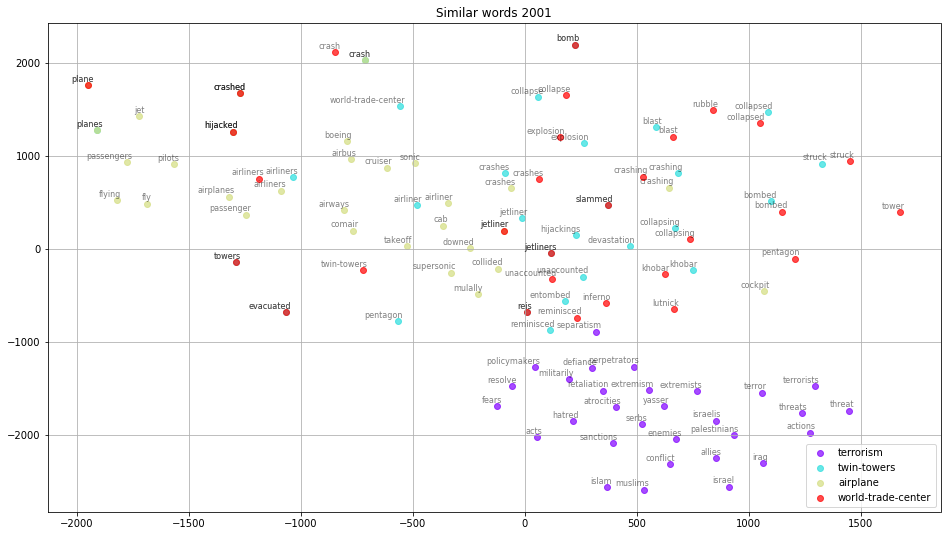

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words 2001', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_CADE2001.png')

## Slice post 2001 - Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center']


embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in slice_post2001.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(slice_post2001[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


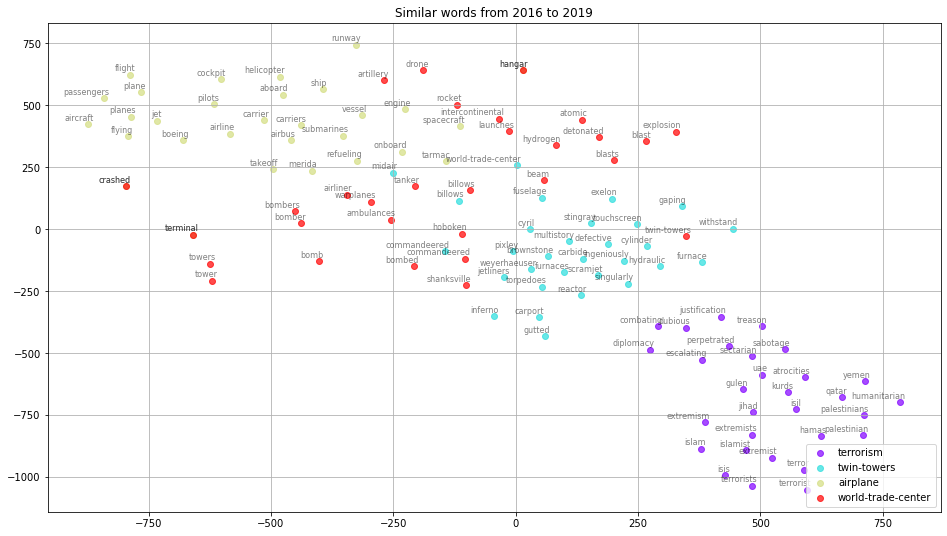

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 2016 to 2019', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_CADE_post2001.png')

## Plot contextual variability

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def context_var(words, embedding):
  
  X = embedding[words]
  pca = PCA(n_components=2)
  
  emb_pca = pca.fit_transform(X)

  plt.scatter(emb_pca[:, 0], emb_pca[:, 1])

  for id, word in enumerate(words):
    # annotate
    plt.annotate(word, xy=(emb_pca[id, 0], emb_pca[id, 1]))
  plt.xticks([])
  plt.yticks([])  

  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


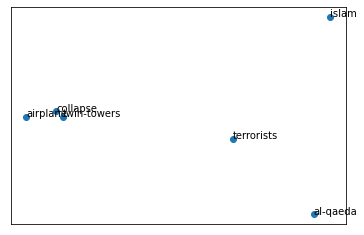

In [ ]:
context_var(['twin-towers', 'terrorists', 'collapse', 'airplane', 'islam', 'al-qaeda'], slice_2001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


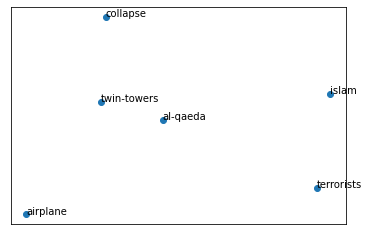

In [ ]:
context_var(['twin-towers', 'terrorists', 'collapse', 'airplane', 'islam', 'al-qaeda'], slice_post2001)